1 加载数据

In [1]:
import pandas as pd
import numpy as np

In [2]:
# 加载数据
data = pd.read_csv('Pharmaceuticals-M02.csv')
data.head()

,Symbol,Name,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin,Median_Recommendation,Location,Exchange
0,ABT,Abbott Laboratories,68.44,0.32,24.7,26.4,11.8,0.7,0.42,7.54,16.1,Moderate Buy,US,NYSE
1,AGN,"Allergan, Inc.",7.58,0.41,82.5,12.9,5.5,0.9,0.60,9.16,5.5,Moderate Buy,CANADA,NYSE
2,AHM,Amersham plc,6.30,0.46,20.7,14.9,7.8,0.9,0.27,7.05,11.2,Strong Buy,UK,NYSE
3,AZN,AstraZeneca PLC,67.63,0.52,21.5,27.4,15.4,0.9,0.00,15.00,18.0,Moderate Sell,UK,NYSE
4,AVE,Aventis,47.16,0.32,20.1,21.8,7.5,0.6,0.34,26.81,12.9,Moderate Buy,FRANCE,NYSE


In [3]:
''' 
maket_cat = 市值
beta = 高beta高风险高收益 低beta低风险低收益
pe_ratio = 市盈率
roe = 股本回报率
roa = 资产回报率
asset_turnover = 资产周转率
leverage = 杠杆率
rev_growth = 预计收入增长
net_profit_margin = 净利润率
median_advice = 中位数建议（各大券商）：买入建议
location = 公司总部所在地
exchange = 公司上市的证券交易所
'''

' \nmaket_cat = 市值\nbeta = 高beta高风险高收益 低beta低风险低收益\npe_ratio = 市盈率\nroe = 股本回报率\nroa = 资产回报率\nasset_turnover = 资产周转率\nleverage = 杠杆率\nrev_growth = 预计收入增长\nnet_profit_margin = 净利润率\nmedian_advice = 中位数建议（各大券商）：买入建议\nlocation = 公司总部所在地\nexchange = 公司上市的证券交易所\n'

2 数据清洗，缺失值，异常值

In [4]:
# 数据描述
data.describe()

,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,57.651429,0.525714,25.461905,25.795238,10.514286,0.700000,0.585714,13.370952,15.695238
std,58.602960,0.256741,16.310257,15.084975,5.321399,0.216795,0.781310,11.048335,6.562048
min,0.410000,0.180000,3.600000,3.900000,1.400000,0.300000,0.000000,-3.170000,2.600000
25%,6.300000,0.350000,18.900000,14.900000,5.700000,0.600000,0.160000,6.380000,11.200000
50%,48.190000,0.460000,21.500000,22.600000,11.200000,0.600000,0.340000,9.370000,16.100000
75%,73.840000,0.650000,27.900000,31.000000,15.000000,0.900000,0.600000,21.870000,21.100000
max,199.470000,1.110000,82.500000,62.900000,20.300000,1.100000,3.510000,34.210000,25.500000


In [5]:
# 数据行列
data.shape

(21, 14)

In [6]:
# 每一列数据类型
data.dtypes

Symbol                    object
Name                      object
Market_Cap               float64
Beta                     float64
PE_Ratio                 float64
ROE                      float64
ROA                      float64
Asset_Turnover           float64
Leverage                 float64
Rev_Growth               float64
Net_Profit_Margin        float64
Median_Recommendation     object
Location                  object
Exchange                  object
dtype: object

In [7]:
# 查看缺失值
data.isnull().sum() # 统计每列有多少缺失值

Symbol                   0
Name                     0
Market_Cap               0
Beta                     0
PE_Ratio                 0
ROE                      0
ROA                      0
Asset_Turnover           0
Leverage                 0
Rev_Growth               0
Net_Profit_Margin        0
Median_Recommendation    0
Location                 0
Exchange                 0
dtype: int64

In [8]:
# 提取纯数字数据
import numpy as np
df = data.select_dtypes(include=[np.number])
df.head()

,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin
0,68.44,0.32,24.7,26.4,11.8,0.7,0.42,7.54,16.1
1,7.58,0.41,82.5,12.9,5.5,0.9,0.60,9.16,5.5
2,6.30,0.46,20.7,14.9,7.8,0.9,0.27,7.05,11.2
3,67.63,0.52,21.5,27.4,15.4,0.9,0.00,15.00,18.0
4,47.16,0.32,20.1,21.8,7.5,0.6,0.34,26.81,12.9


3 计算维度相关性

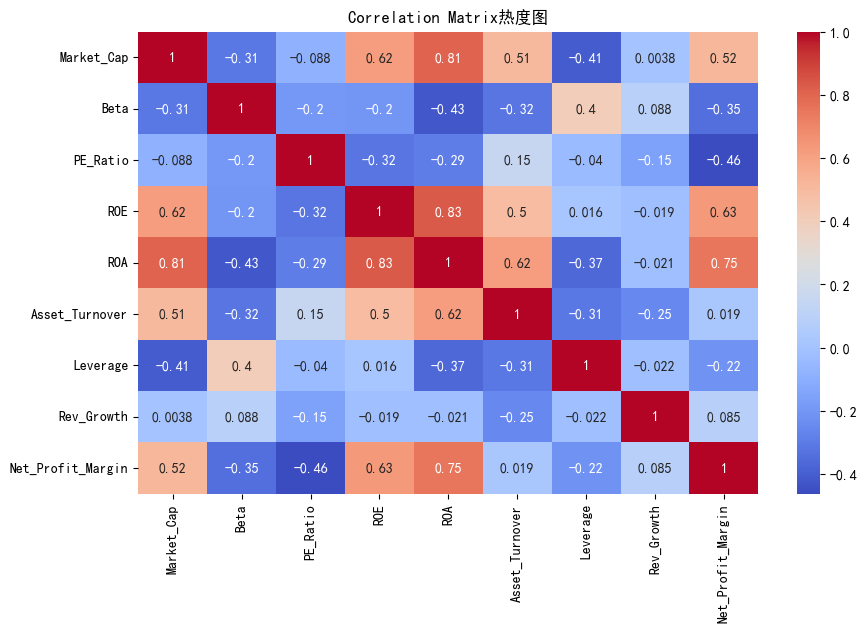

In [10]:
# 计算相关性
corr = df.corr()

# 热度图查看维度相关性
import seaborn as sns
import matplotlib.pyplot as plt 
# 设置中文字体显示
plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix热度图')
plt.show()

In [ ]:
''' 
肉眼观察分类
1
market_cap , roe,roa ,asset_turnover, net_profit_margin

2
beta ,leverage

3
pe_ratio

4 
rev_growth
'''

''' 
希望的是 
各个维度之间互相垂直 
不同维度相关性 = 0
在这个基础上进行聚类
'''

4 切分 x 输入特征

In [11]:
import numpy as np
x = data.select_dtypes(include=[np.number])

5 归一化

In [12]:
# 方差均值归一化
# 归一化不会破坏相关性
from sklearn import preprocessing
mean_std_scaler = preprocessing.StandardScaler() # 缩放器
scale_x = mean_std_scaler.fit_transform(x) # 缩放
scale_x
x = pd.DataFrame(scale_x, columns=x.columns) # array -> dataframe
x.describe()

,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin
count,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01
mean,1.652118e-16,-2.907727e-16,-2.643388e-16,-1.691768e-16,4.229421e-17,-2.405483e-16,1.480297e-16,-6.344132e-17,-1.480297e-16
std,1.024695e+00,1.024695e+00,1.024695e+00,1.024695e+00,1.024695e+00,1.024695e+00,1.024695e+00,1.024695e+00,1.024695e+00
min,-1.000888e+00,-1.379804e+00,-1.373478e+00,-1.487304e+00,-1.755058e+00,-1.890626e+00,-7.681693e-01,-1.534116e+00,-2.044884e+00
25%,-8.978993e-01,-7.013055e-01,-4.122530e-01,-7.400938e-01,-9.270448e-01,-4.726566e-01,-5.583279e-01,-6.483868e-01,-7.019528e-01
50%,-1.654367e-01,-2.622769e-01,-2.489074e-01,-2.170467e-01,1.320420e-01,-4.726566e-01,-3.222564e-01,-3.710746e-01,6.320550e-02
75%,2.830633e-01,4.960453e-01,1.531738e-01,3.535501e-01,8.637746e-01,9.453132e-01,1.873584e-02,7.882574e-01,8.439793e-01
max,2.479752e+00,2.331983e+00,3.583430e+00,2.520459e+00,1.884349e+00,1.890626e+00,3.835226e+00,1.932750e+00,1.531060e+00


6 降维

In [13]:
# 降维 = 合并高相关性维度，并重新转换坐标

7 计算最佳k值

In [14]:
# 计算有多少个k，方法1
# 手肘法wcss
'''
紧凑度 = 内质心距离平方和 
越小越紧凑
当减少速度变慢时，就是最佳k值

'''
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0,n_init=10,max_iter=300)
    kmeans.fit(scale_x)
    wcss.append(kmeans.inertia_)
print(wcss)

[189.00000000000003, 124.49780964549282, 103.42214583473769, 88.06360138017543, 67.37830017847095, 55.30849285733849, 45.391796825333785, 36.4762668461292, 29.36965430287587, 24.639753475324255]


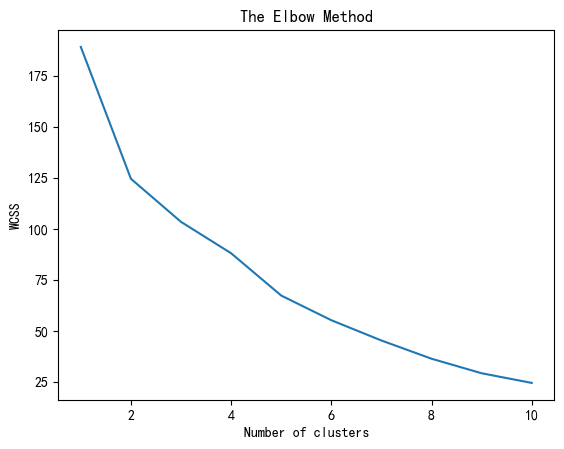

In [15]:
# 画图
import matplotlib.pyplot as plt
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [16]:
# 计算有多少个k，方法2
# 轮廓分数
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9 ,10]
silhouette_scores = []
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(scale_x)

    silhouette_avg = silhouette_score(scale_x, cluster_labels)
    silhouette_scores.append(silhouette_avg)
print(silhouette_scores)

[np.float64(0.2732188311065932), np.float64(0.18196740803441408), np.float64(0.22765638771789304), np.float64(0.18837523705231657), np.float64(0.20492520108845821), np.float64(0.15254139035648567), np.float64(0.09491845863045464), np.float64(0.16971685189865832), np.float64(0.13898840134665275)]


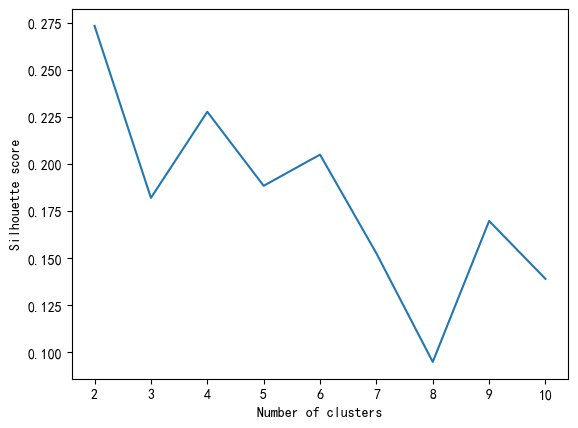

In [17]:
# 画图
plt.plot(range_n_clusters, silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

8 聚类

In [18]:
# 聚类 = 在现有维度空间中进行分组找到质心
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4, init='k-means++', random_state=0,n_init=10,max_iter=300).fit(x)

9 可视化

In [19]:
cluters = km.predict(x) # 预测结果
# 必须命名为label才能被作图识别
data['label'] = cluters # 分类结果 添加到原始数据中
data.head()

,Symbol,Name,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin,Median_Recommendation,Location,Exchange,label
0,ABT,Abbott Laboratories,68.44,0.32,24.7,26.4,11.8,0.7,0.42,7.54,16.1,Moderate Buy,US,NYSE,2
1,AGN,"Allergan, Inc.",7.58,0.41,82.5,12.9,5.5,0.9,0.60,9.16,5.5,Moderate Buy,CANADA,NYSE,3
2,AHM,Amersham plc,6.30,0.46,20.7,14.9,7.8,0.9,0.27,7.05,11.2,Strong Buy,UK,NYSE,3
3,AZN,AstraZeneca PLC,67.63,0.52,21.5,27.4,15.4,0.9,0.00,15.00,18.0,Moderate Sell,UK,NYSE,2
4,AVE,Aventis,47.16,0.32,20.1,21.8,7.5,0.6,0.34,26.81,12.9,Moderate Buy,FRANCE,NYSE,3


In [21]:
# 将聚类中心坐标保存
centroids = pd.DataFrame(km.cluster_centers_, columns=x.columns)
centroids['cluster'] = ['Cluster {}'.format(i) for i in centroids.index]
centroids

,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin,cluster
0,-0.931506,1.445944,-0.267755,-0.723791,-1.138862,-1.039845e+00,1.057451,0.276853,-0.711322,Cluster 0
1,1.803417,-0.102630,-0.292885,1.932881,1.778440,9.453132e-01,-0.440292,0.958447,1.164097,Cluster 1
2,0.442588,-0.426358,-0.281018,0.392797,0.649818,3.676218e-01,-0.319342,-0.576457,0.595867,Cluster 2
3,-0.586520,-0.637447,0.890742,-0.756397,-0.742186,-2.838999e-16,-0.306518,0.377390,-0.826877,Cluster 3


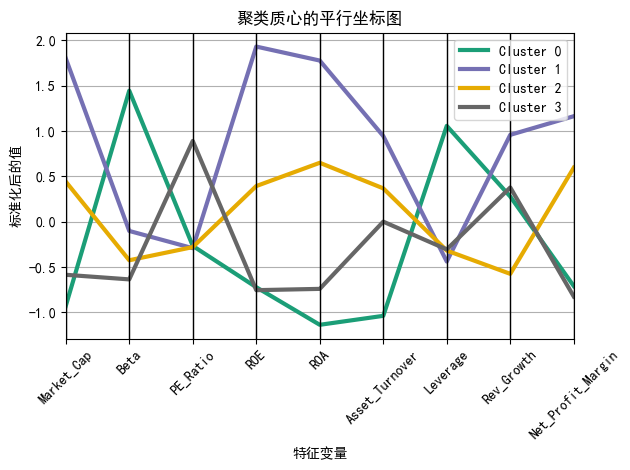

In [22]:
# 创建平行坐标图来可视化每个簇的质心
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

parallel_coordinates(centroids, class_column='cluster', colormap='Dark2', linewidth=3)
plt.title('聚类质心的平行坐标图')
plt.xlabel('特征变量')
plt.ylabel('标准化后的值')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
''' 
结论
————————当前赚钱————————
1,2
相同
盈利能力强 财务健康 1>2

不同
1 预期增长快 为独角兽企业
2 预期增长为负 可能在转型

————————当前亏钱————————
0,3
相同
都在烧钱 但有一定增长预期

不同
0 高负债赌博型
3 市场期待pe高 为潜力股

========================================
投资建议
0 高负债 若财务有问题需要及时抛售
1 符合市场趋势但估值较高
2 可能在转型困难 的传统企业
3 中可能存在优质的低估值公司
'''